<a href="https://colab.research.google.com/github/slouxjiwon/ITB/blob/main/1910621_%EC%9D%B4%EC%A7%80%EC%9B%90_%EC%95%84%EB%B9%84%ED%98%81_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

plt.rc('font', family='NanumGothic') 
plt.rc("axes", unicode_minus=False)

import matplotlib
matplotlib.font_manager._rebuild()

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/health_data.csv", encoding="UTF-8")

In [6]:
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [7]:
df.shape

(10000, 31)

In [8]:
df.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')

In [9]:
df.dtypes

기준년도             int64
가입자일련번호          int64
시도코드             int64
성별코드            object
연령대코드(5세단위)      int64
신장(5Cm단위)        int64
체중(5Kg 단위)       int64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)            int64
청력(우)            int64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태            object
음주여부            object
구강검진수검여부         int64
치아우식증유무        float64
치석             float64
데이터공개일자         object
dtype: object

In [10]:
df.isnull().sum()

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

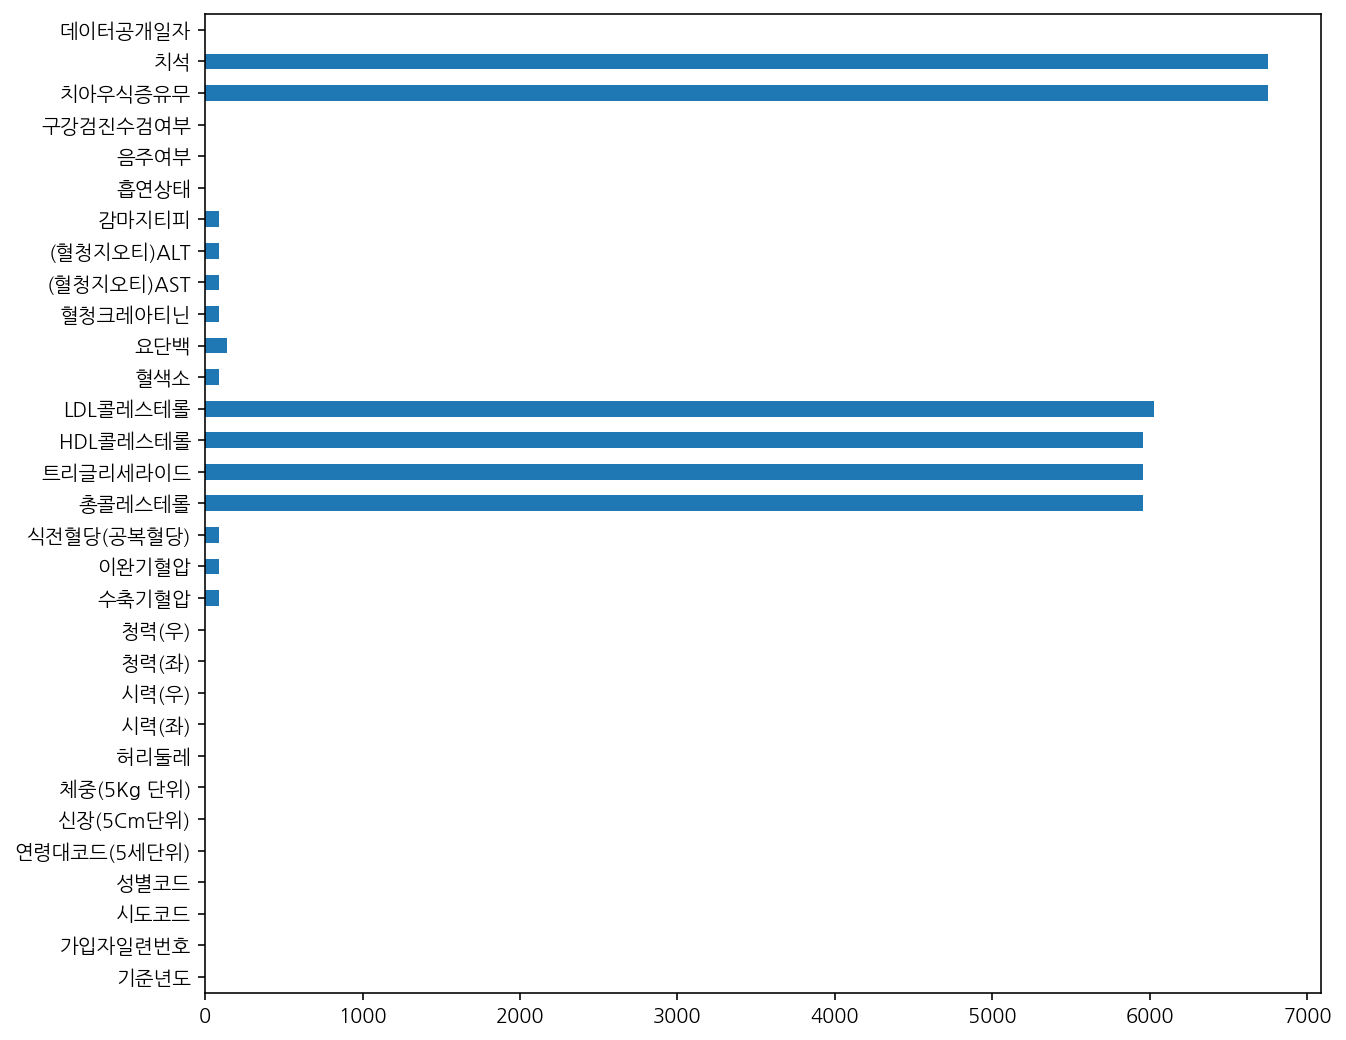

In [11]:
df.isnull().sum().plot.barh(figsize=(10, 9)) #결측치 시각화로 확인, 결측치가 5000이상을 넘어가는 열 확인

In [12]:
df_1 = df.drop(['치석','치아우식증유무','LDL콜레스테롤','HDL콜레스테롤','트리글리세라이드','총콜레스테롤','구강검진수검여부'], axis=1)
#결측치가 절반 이상인 값과 치석, 우식증유무와 관련된 구강검진 삭제

In [13]:
df_1.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST',
       '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '데이터공개일자'],
      dtype='object')

In [14]:
df_1 = df_1.dropna()
df_1.shape #총 152개의 결측치가 포함된 행 삭제(행이 매우 많아 측정에는 문제없을 것이라 생각)

(9858, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16a5419090>,
      dtype=object)

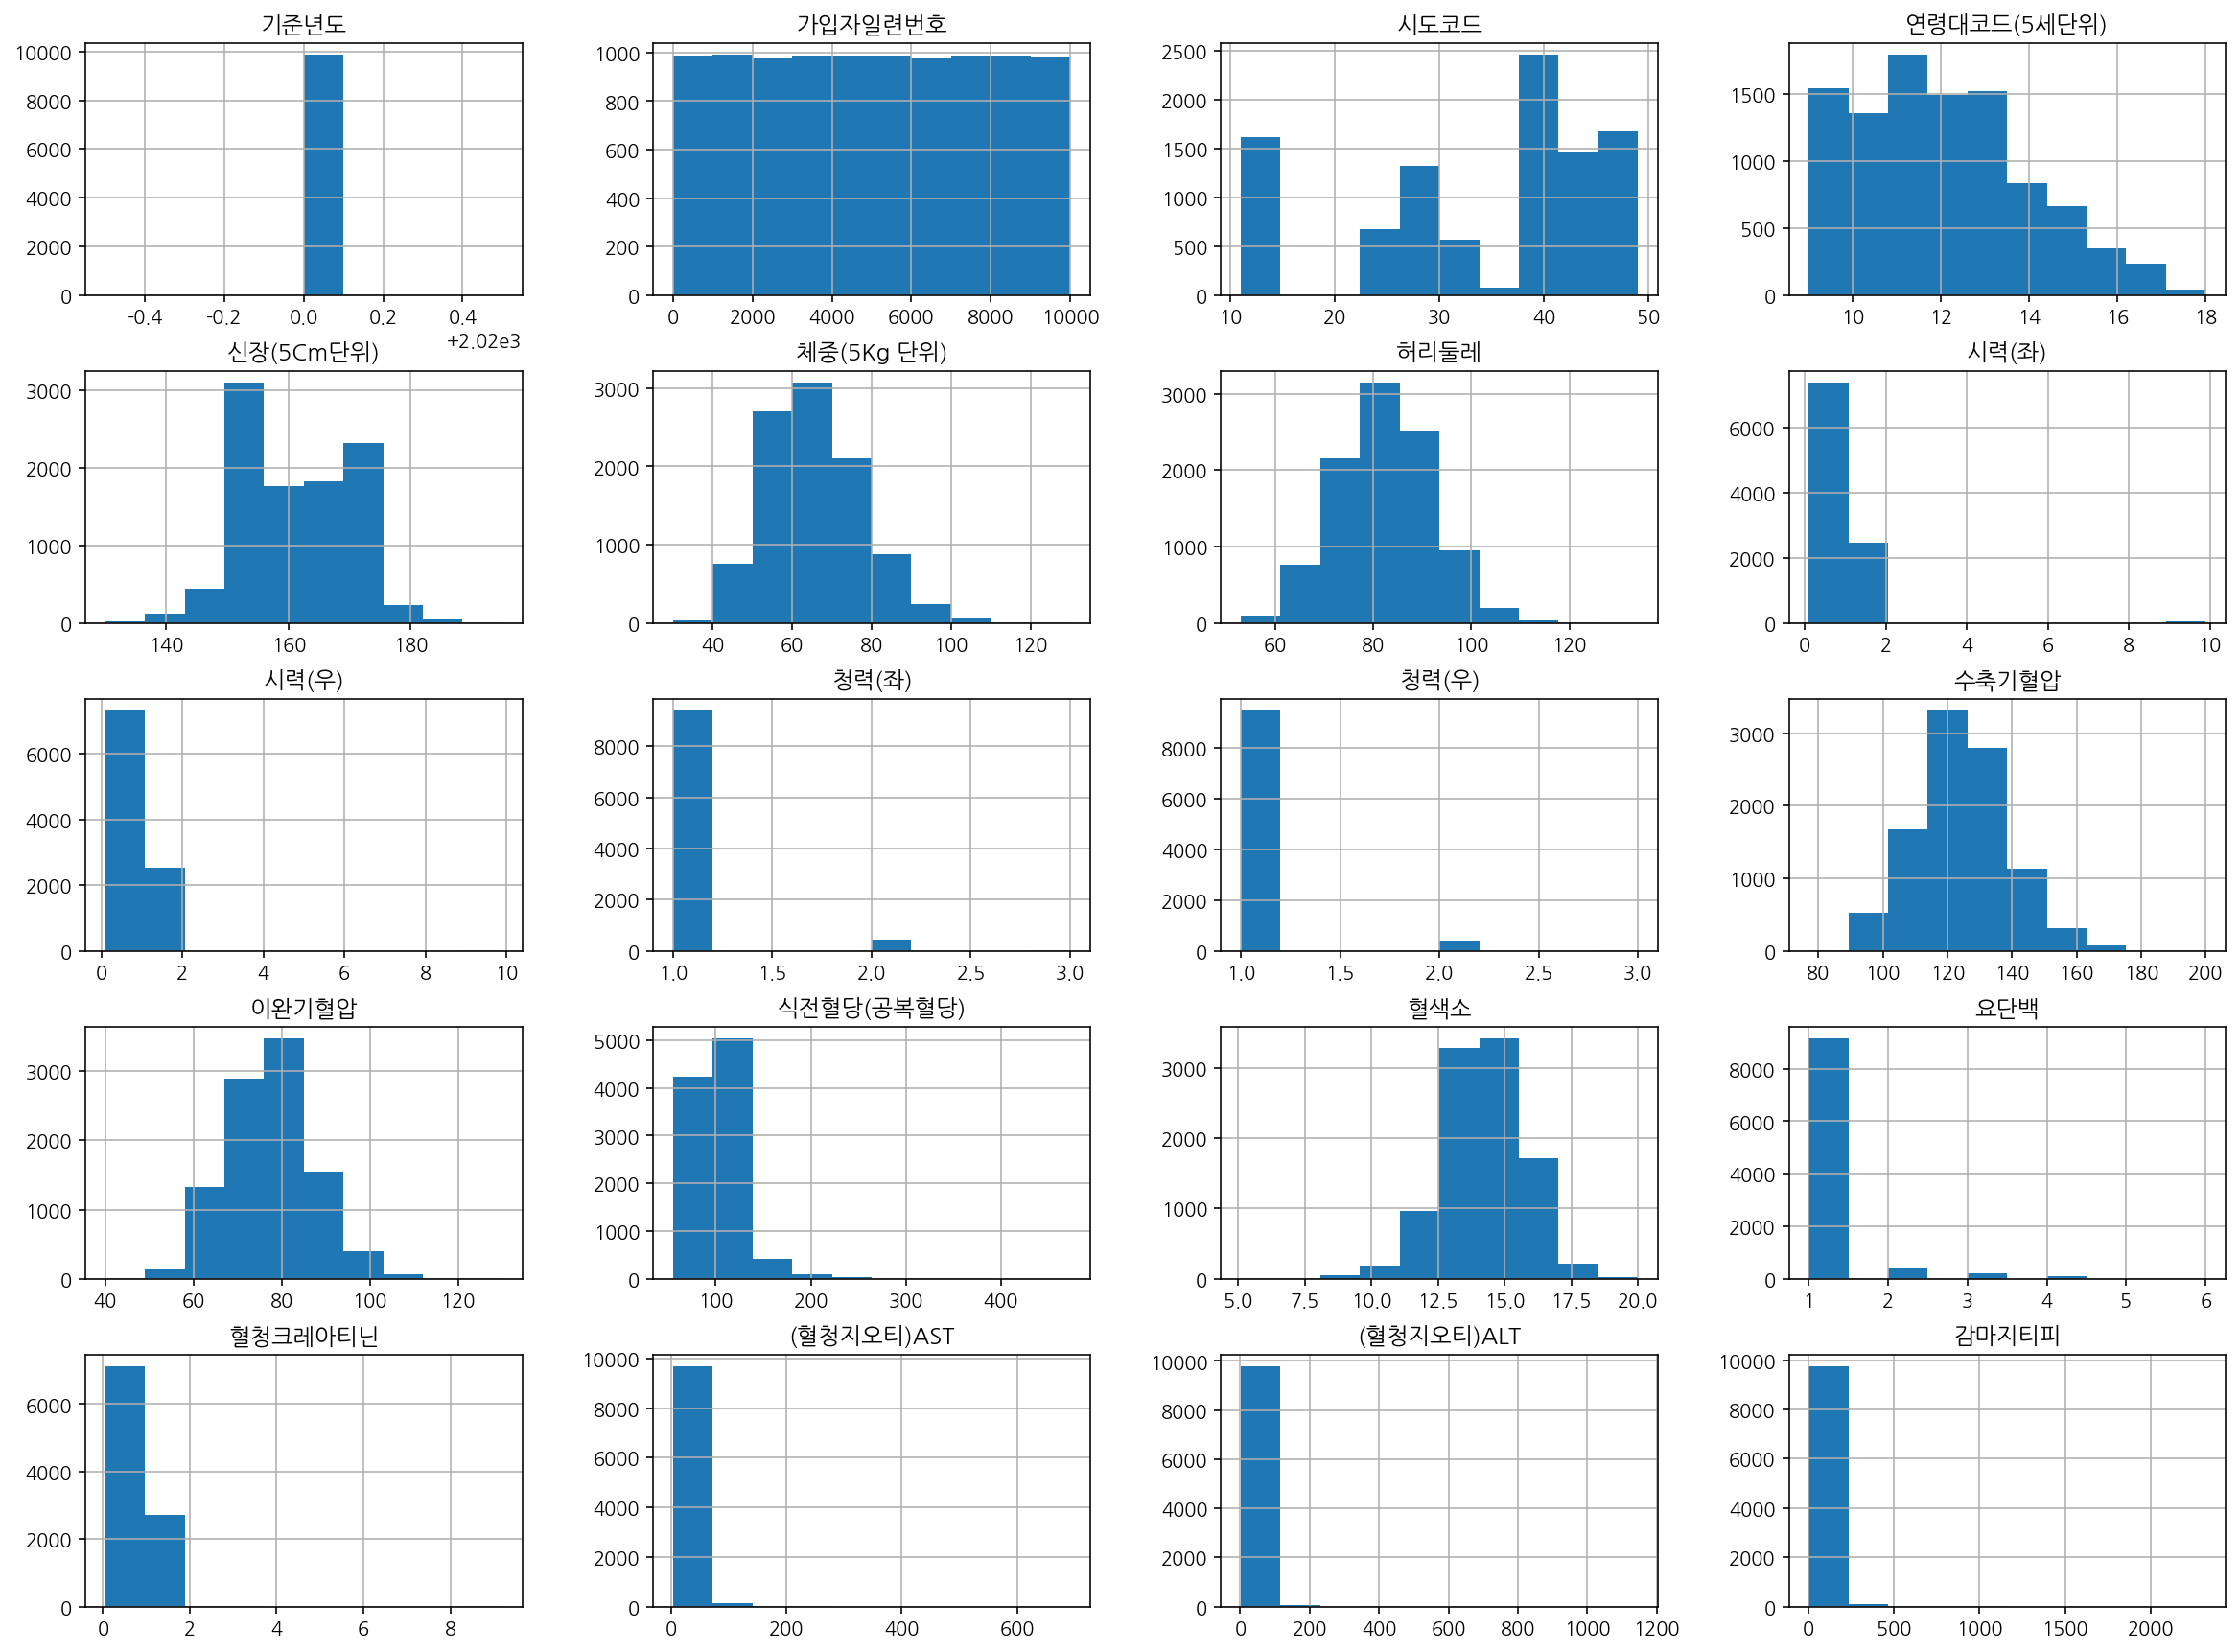

In [15]:
df_1.hist(bins=10, figsize=(20,15)) #수치형 데이터 전체적으로 확인

흡연상태에 관한 데이터 분석 및 시각화

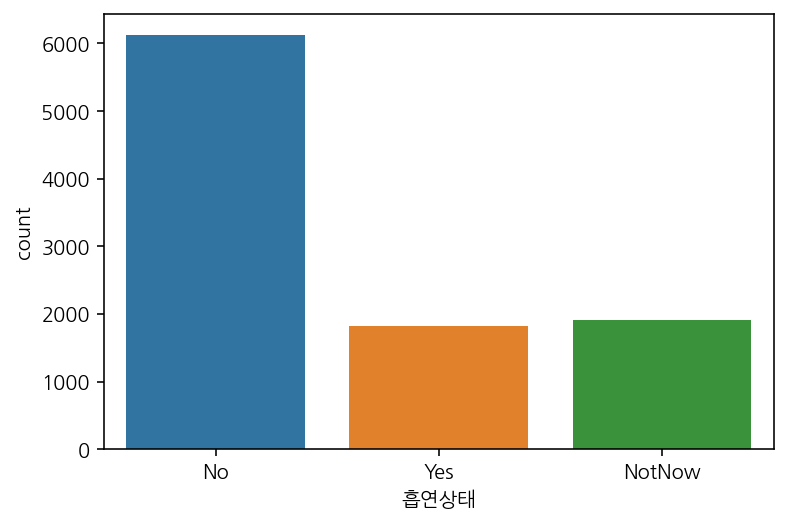

In [19]:
sns.countplot(x="흡연상태", data=df_1) #흡연하지 않은 사람이 제일 많고, 하고 있거나 금연한 사람의 비율은 비슷함

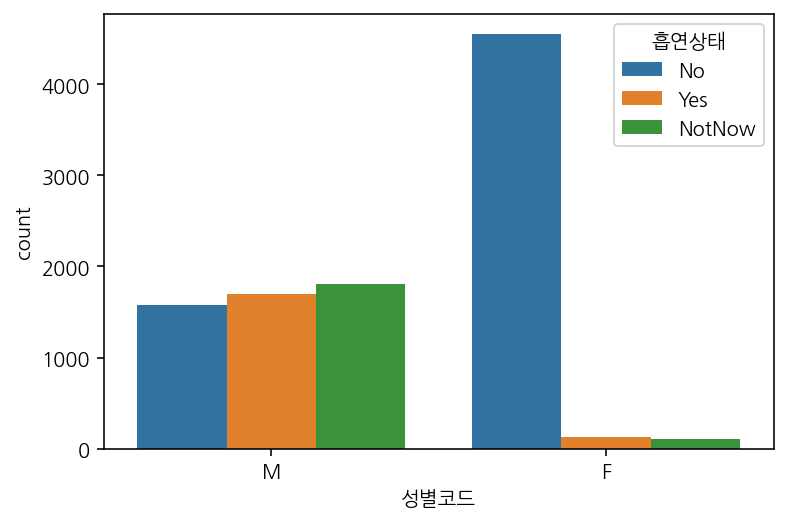

In [35]:
sns.countplot(data=df_1, x="성별코드", hue="흡연상태") #남성이 여성에 비해 흡연 경험이 크게 높았음

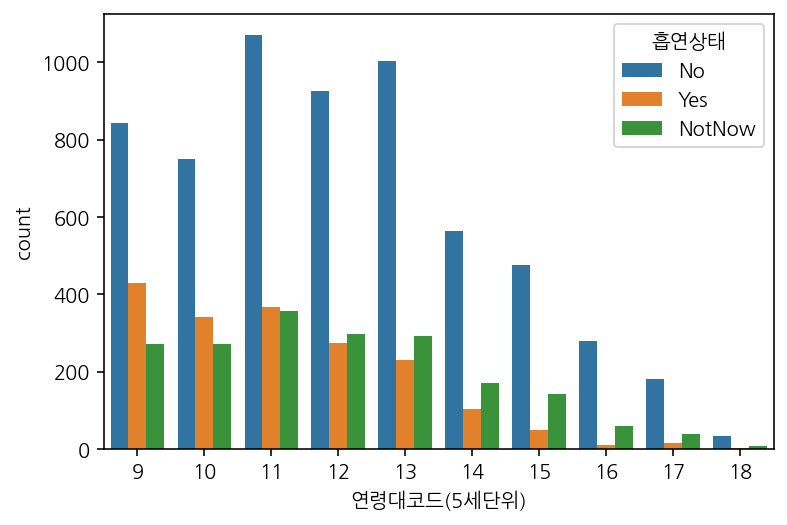

In [34]:
sns.countplot(data=df_1, x="연령대코드(5세단위)", hue="흡연상태") 
#45세~55세까지는 금연 인구보다 흡연 인구가 더 높지만, 그 이후로는 금연 하는 추세를 보임

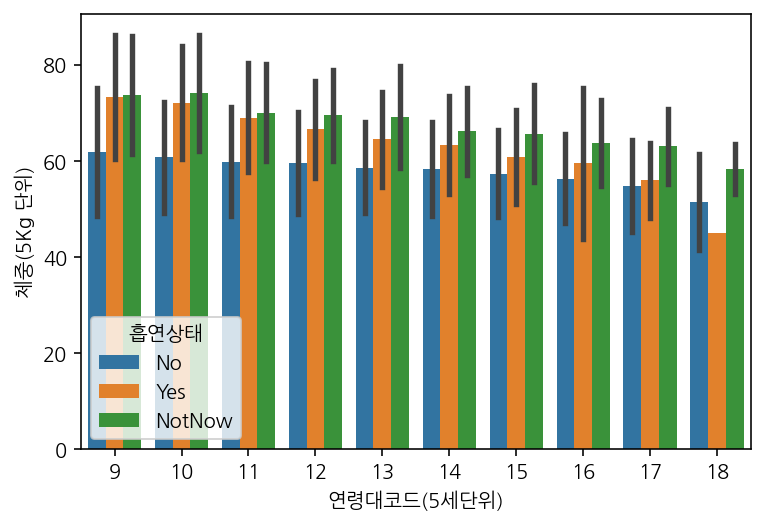

In [30]:
sns.barplot(data=df_1, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="흡연상태", ci="sd")
#위의 그래프에 체중의 변화를 확인해보았음. 체중은 흡연안함 < 흡연함 < 금연함 순으로 높았음
#흡연 이후의 금연히 체중의 증가에 큰 폭의 변화를 주는 것을 확인

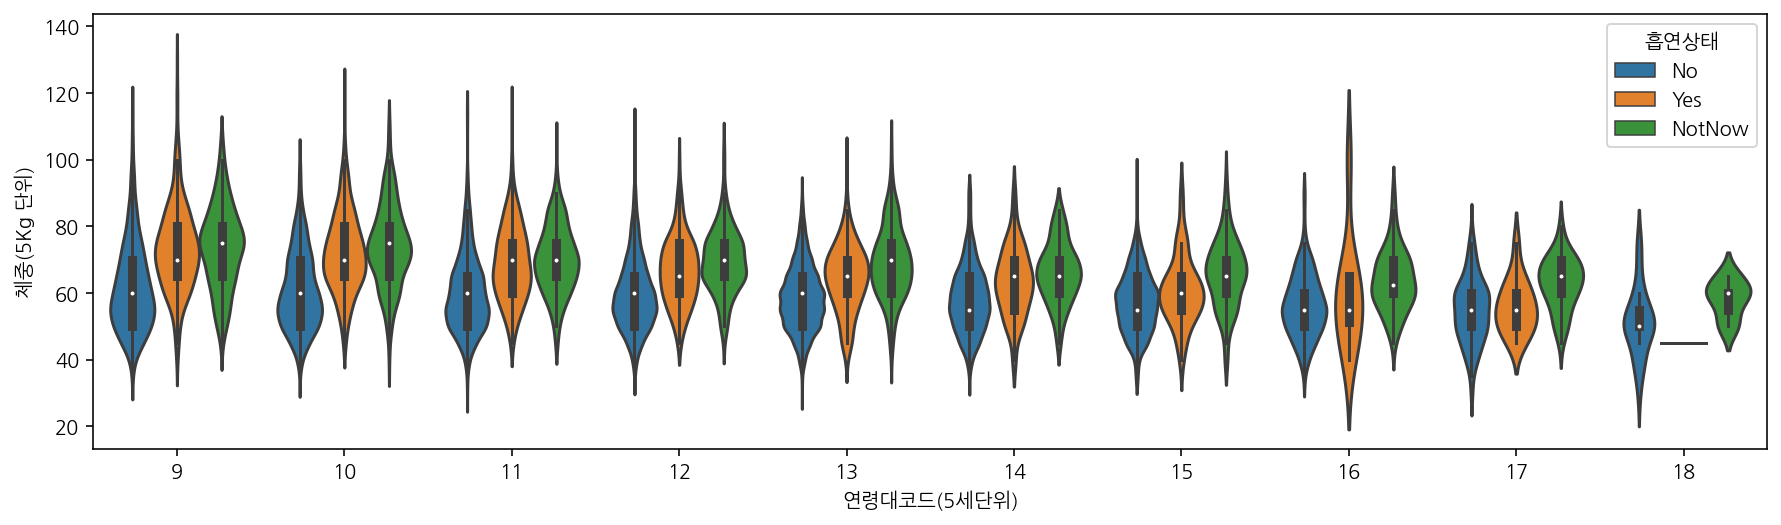

In [41]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_1, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="흡연상태")
#위의 그래프를 바이올렛 형태로 확인해보면, 흡연을 경험해본 집단의 분포가 상대적으로 더 높은 체중에 있는 것을 확인할 수 있다.
#그 중에서도 금연을 한 집단이 더 높은 체중에 분포의 밀도가 높았다

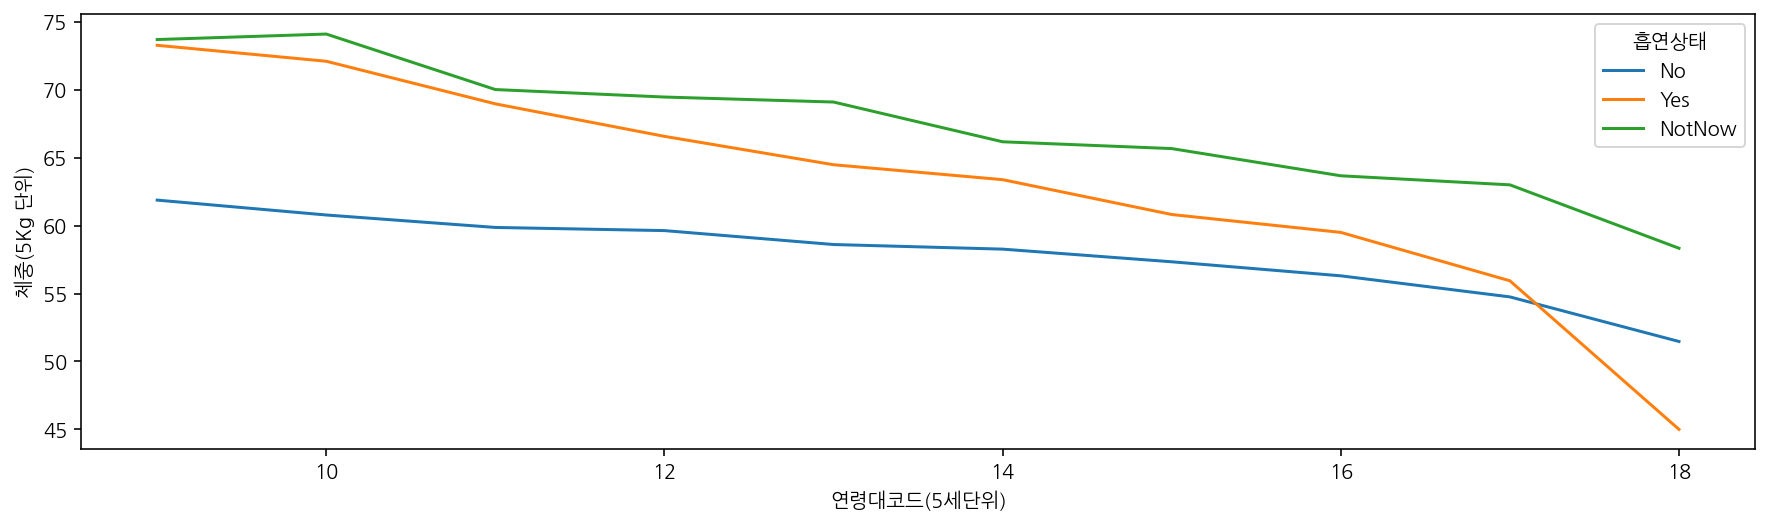

In [50]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_1, x="연령대코드(5세단위)", y="체중(5Kg 단위)", hue="흡연상태", ci=None)
#선그래프로 확인해보면 더욱 확연한 차이를 확인해볼 수 있다

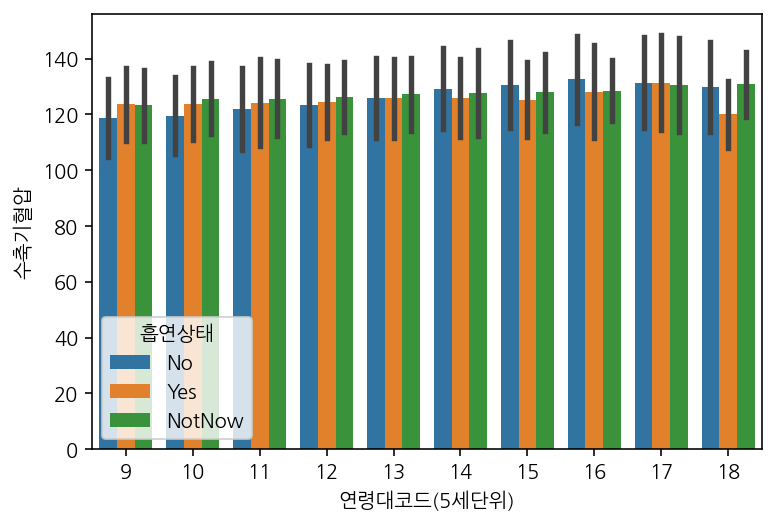

In [43]:
sns.barplot(data=df_1, x="연령대코드(5세단위)", y="수축기혈압", hue="흡연상태", ci="sd")
#수축기혈압에 대해서는 흡연상태의 큰 영향력을 확인하지 못함

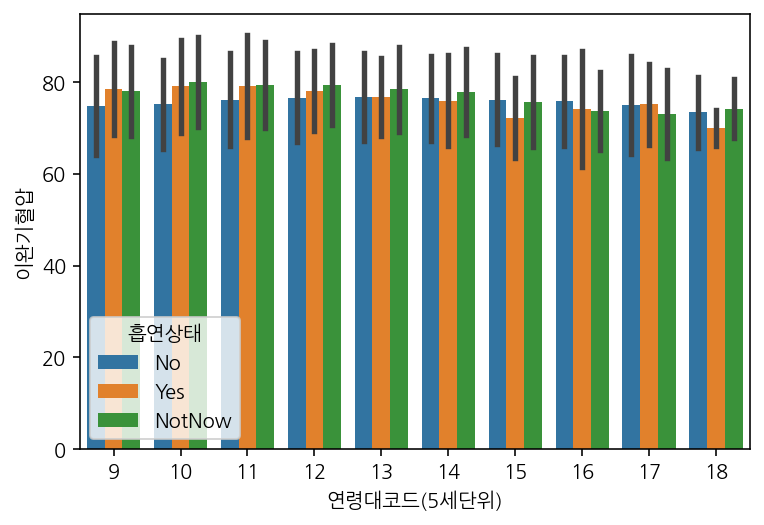

In [49]:
sns.barplot(data=df_1, x="연령대코드(5세단위)", y="이완기혈압", hue="흡연상태", ci="sd")
#이완기혈압에 대해서는 흡연상태의 큰 영향력을 확인하지 못함

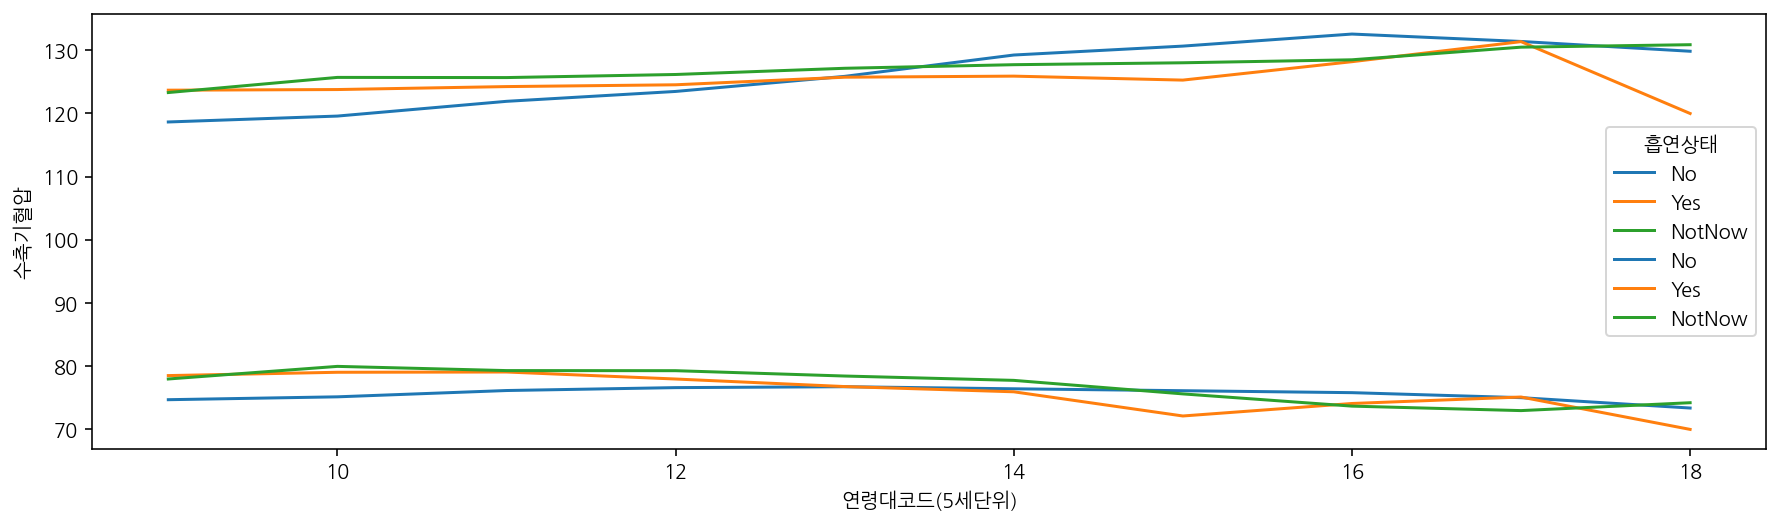

In [51]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_1, x="연령대코드(5세단위)", y="수축기혈압", hue="흡연상태", ci=None)
sns.lineplot(data=df_1, x="연령대코드(5세단위)", y="이완기혈압", hue="흡연상태", ci=None)
#선그래프로 혈압을 확인했을 때, 큰 상관관계를 확인할 수 없었음

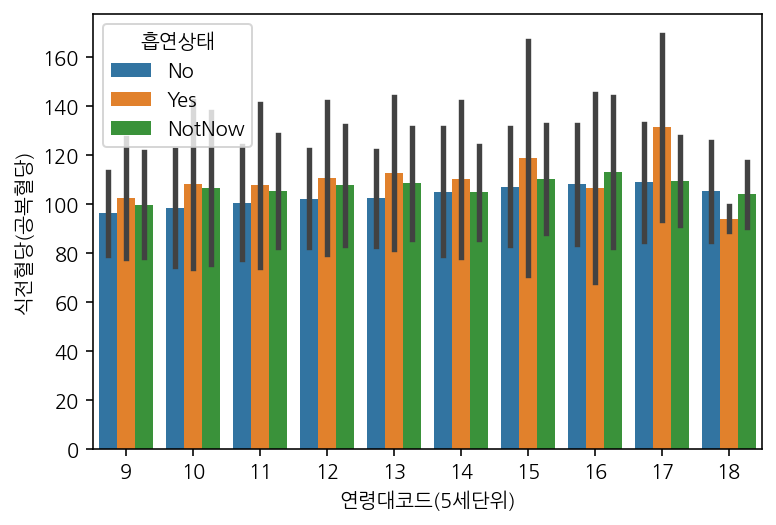

In [44]:
sns.barplot(data=df_1, x="연령대코드(5세단위)", y="식전혈당(공복혈당)", hue="흡연상태", ci="sd")
#식전혈당은 80세, 90세를 제외한 전 연령대 그룹이 흡연안함<금연했음<흡연함 순으로 높게 기록되었음

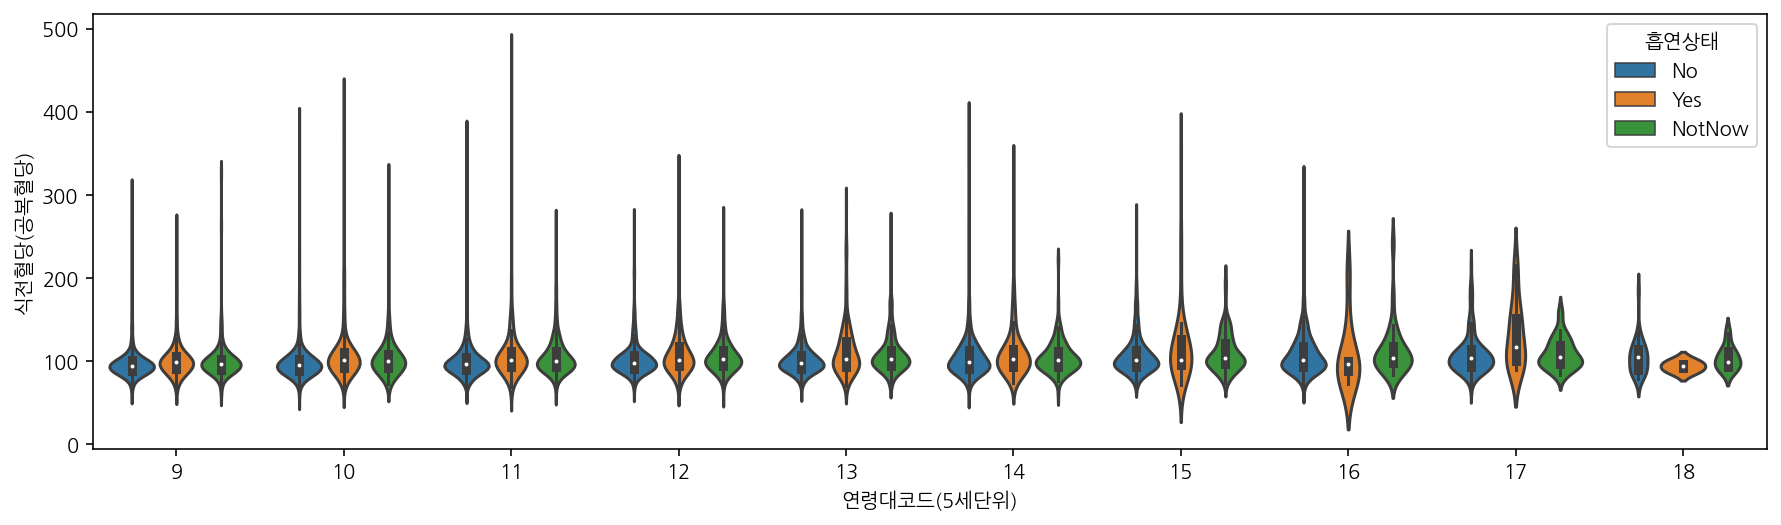

In [45]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_1, x="연령대코드(5세단위)", y="식전혈당(공복혈당)", hue="흡연상태")
#바이올렛분포로 살펴보면, 이상치로 길쭉한 부분을 제외하면 대체로 흡연한 그룹이 더 높은 식전혈당을 보이는 것을 확인할 수 있음

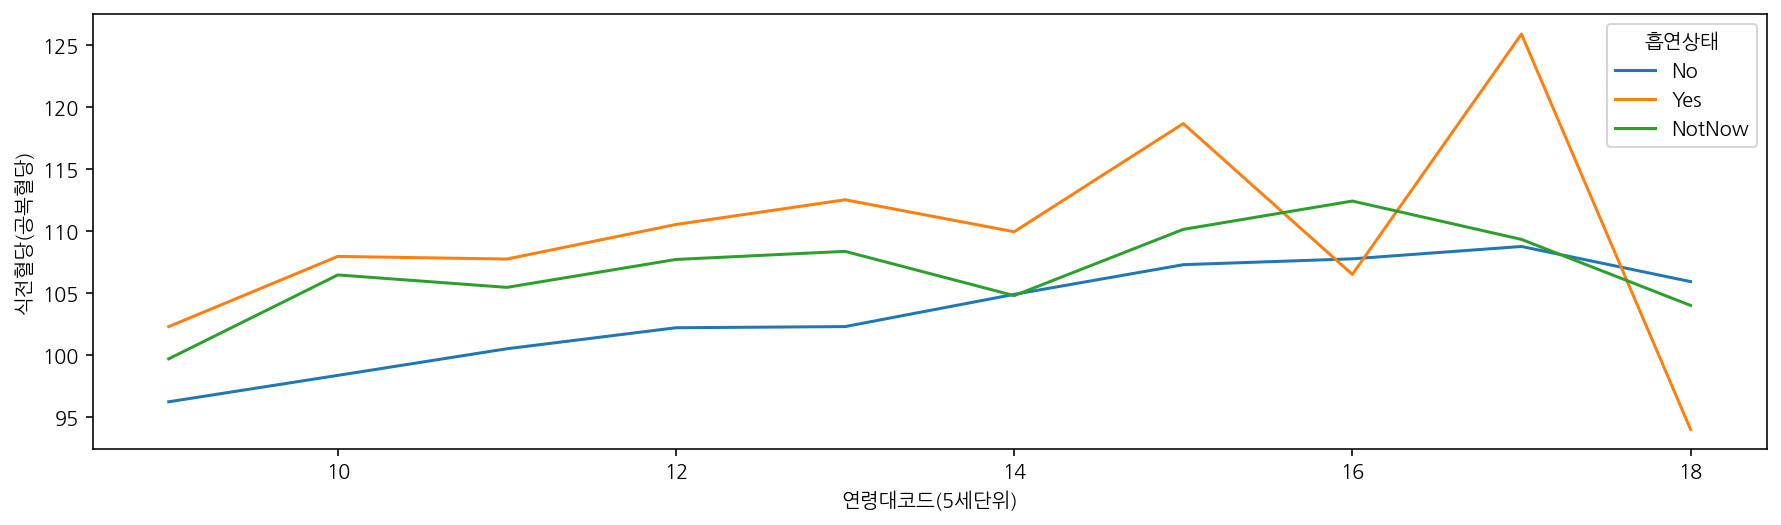

In [48]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="식전혈당(공복혈당)", hue="흡연상태", ci=None)
#다소 불확실하지만 80세 이상 고령기를 제외하면 흡연시 더 높은 식전혈당이 확인되는 것을 볼 수 있음

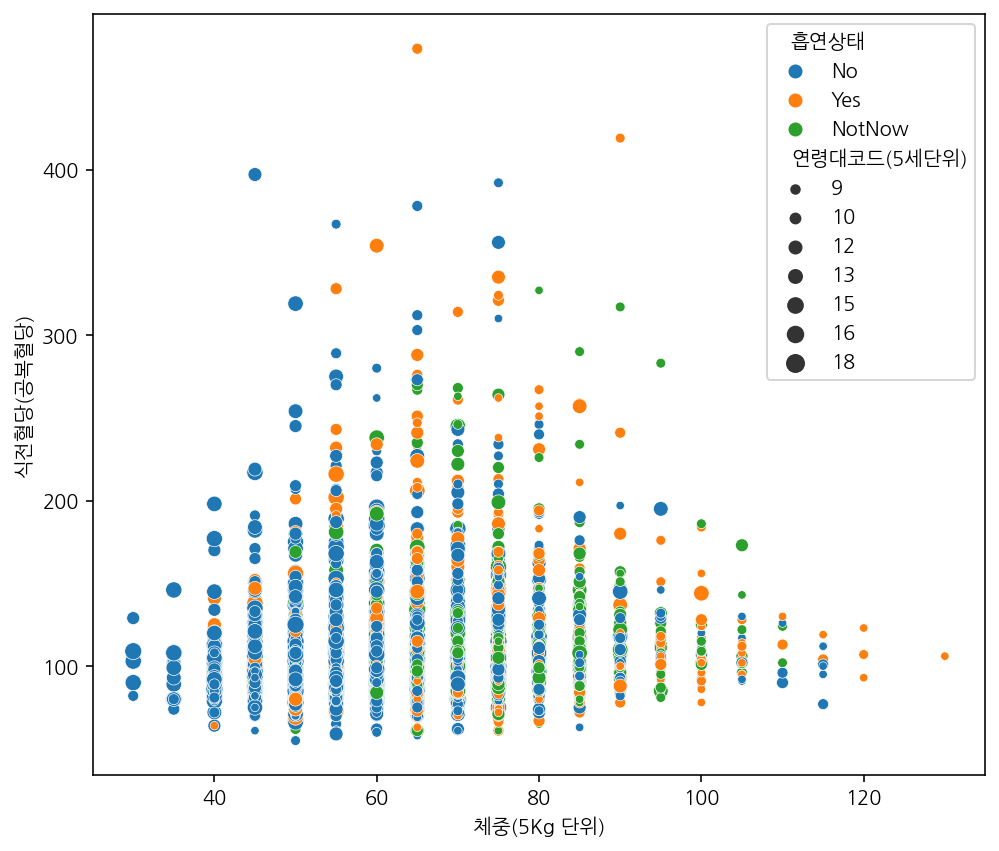

In [60]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_1, x="체중(5Kg 단위)", y="식전혈당(공복혈당)", hue="흡연상태", size="연령대코드(5세단위)")
#산점도로 해당 결과를 요약해보려 시도했으나.. 눈에 잘 들어오지 않는다

In [62]:
df_sample = df_1.sample(1000, random_state=1)
df_sample.shape
#swarm plot을 시도하고자 샘플 데이터를 추출한다(전체로 하면 시간이 너무 오래 걸린다)

(1000, 24)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; y

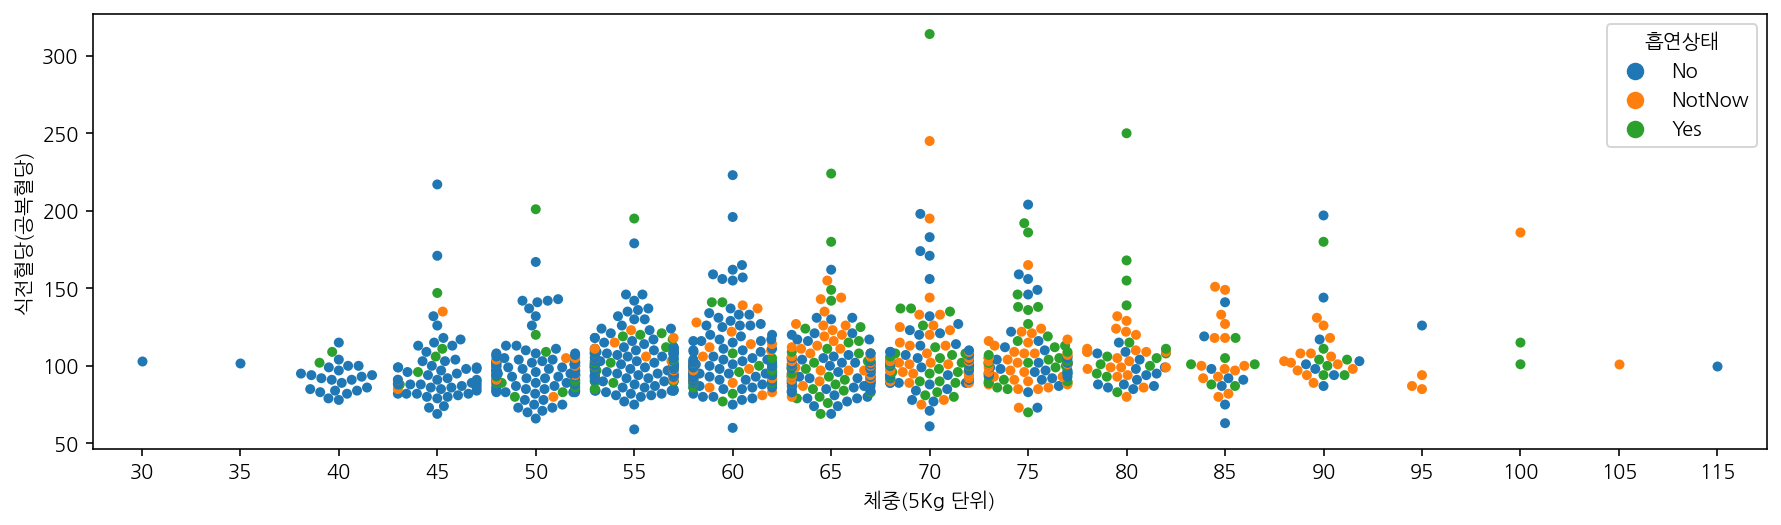

In [65]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="체중(5Kg 단위)", y="식전혈당(공복혈당)", hue="흡연상태")
#swarm plot으로 결과를 요약해보았다.
#과체중 범주로 체중이 올라 갈 수록 흡연의 경험 비율이 높아진다.
#식전혈당은 선 형태의 그래프가 아니면 크게 눈에 띄진 않는다는 단점이 있다.

흡연상태로 얻어낸 인사이트
1. 흡연인구 중 대다수는 남성이다. 여성은 대부분 흡연을 경험조차 하지 않은 것으로 확인됨.
2. 흡연은 체중을 높인다. 또한 금연을 할 시 흡연을 할 때보다 체중이 더욱 올라간다.
3. 흡연은 식전혈당을 높인다. 금연을 하게 되더라도 흡연을 경험하지 않았을 때보다 높은 식전혈당이 나타난다.
4. 흡연은 혈압의 여부에는 크게 상관하지 않는다.